<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [25]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


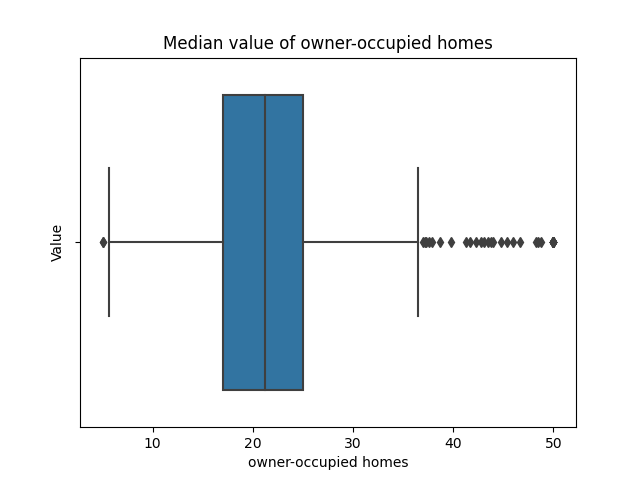

In [19]:
#For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(x=boston_df["MEDV"])
plt.title("Median value of owner-occupied homes")
plt.xlabel("owner-occupied homes")
plt.ylabel("Value")
plt.show()

In [28]:
#Provide a  bar plot for the Charles river variable



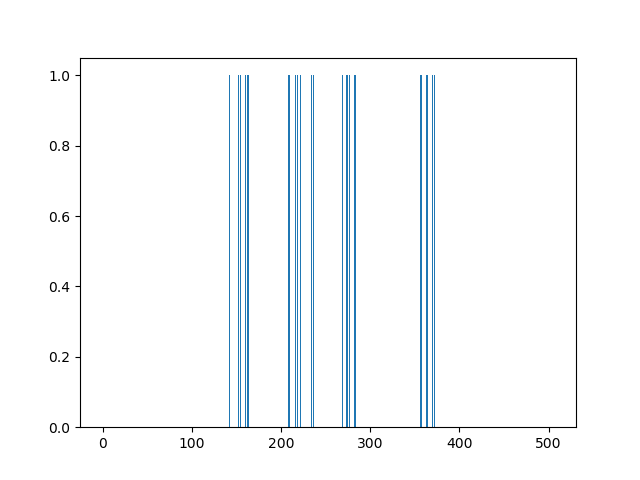

In [22]:
plt.bar(x=boston_df.index, height=boston_df["CHAS"])
plt.show()

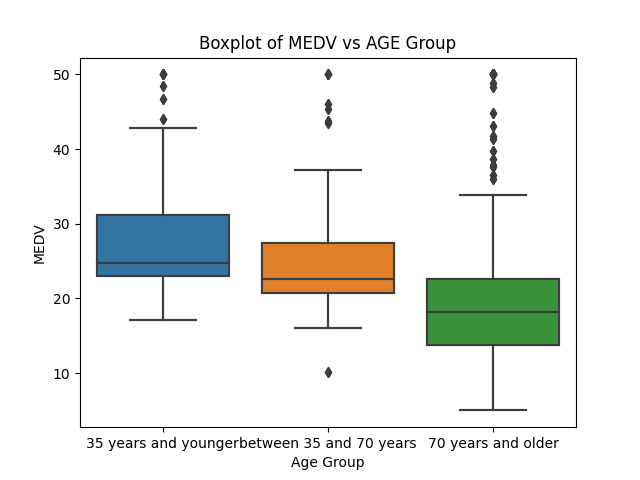

In [27]:
# Discretize the AGE variable into three groups
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, np.inf], labels=["35 years and younger", "between 35 and 70 years", "70 years and older"])

# Create a box plot of MEDV vs AGE_group
sns.boxplot(x="AGE_group", y="MEDV", data=boston_df)

# Add a title and axis labels
plt.title("Boxplot of MEDV vs AGE Group")
plt.xlabel("Age Group")
plt.ylabel("MEDV")
plt.show()

In [29]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



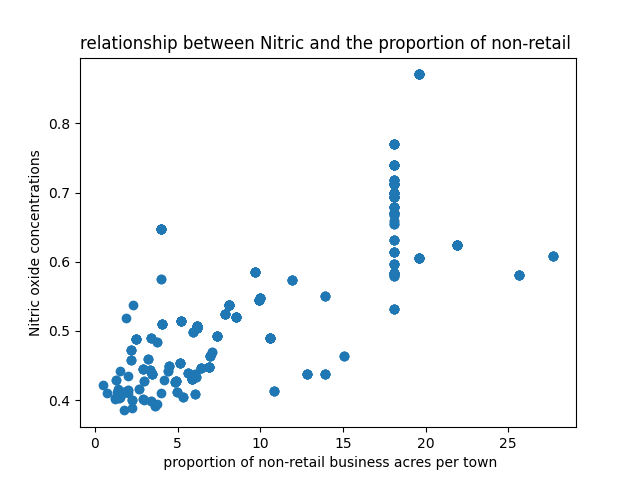

In [33]:

# Extract NOX and INDUS data
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Create scatter plot
plt.scatter(indus, nox)
plt.title('relationship between Nitric and the proportion of non-retail ')
plt.xlabel(' proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')
plt.show()

In [40]:
#As you can see, the higher the proportion of non-retail business acres per town , the higher the NOX(Nitric Oxide Concentrations).

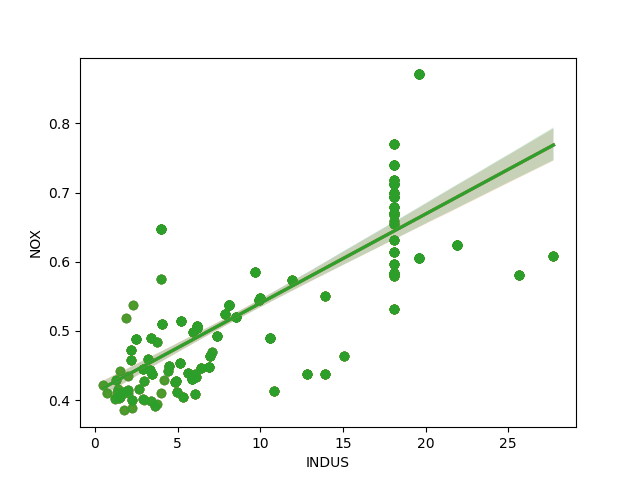

In [43]:
sns.regplot(x='INDUS', y='NOX', data=boston_df)
plt.show()

In [35]:
#Create a histogram for the pupil to teacher ratio variable



<ipython-input-45-f0994eb7c822>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histplot = sns.distplot(boston_df['PTRATIO'])


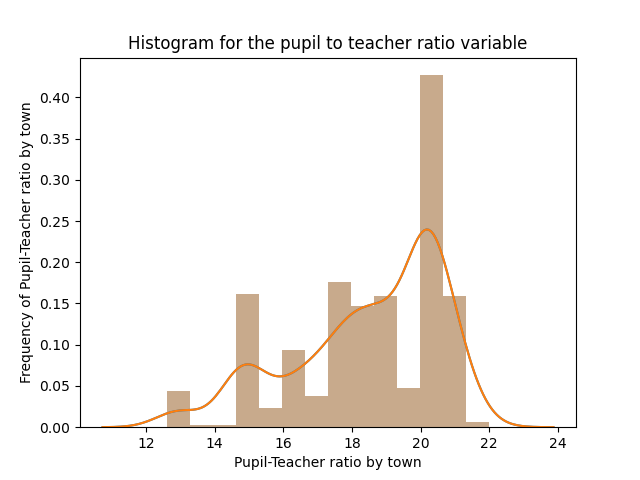

In [45]:
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")
plt.show()

In [47]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [48]:
State the hypothesis

𝐻_0:µ_1=µ_2
  ("there is no difference in median value of houses whether it is bounded by Charles river or not")
𝐻_1:µ_1≠µ_2
  ("there is a difference in median value of houses whether it is bounded by Charles river or not")
α = 0.05

<class 'SyntaxError'>: invalid character '≠' (U+2260) (<ipython-input-48-49d22db42627>, line 5)

<ipython-input-50-8d628a577eab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


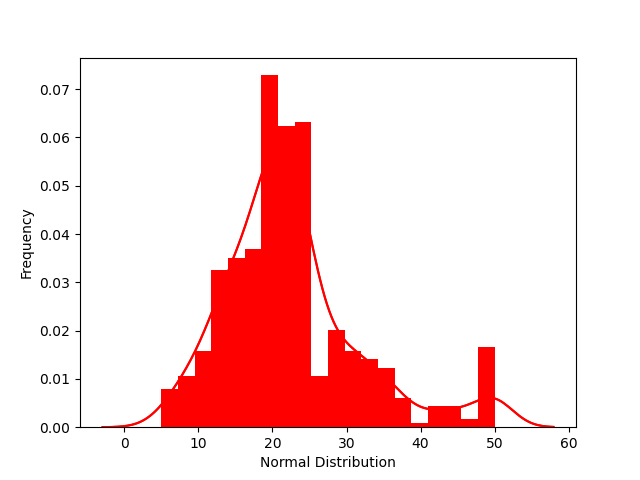

In [50]:
# First we plot the dependent variable with a histgram:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [52]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [53]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"
scipy.stats.levene(boston_df[boston_df['Age_Group']=='35 and younger']['MEDV'], boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [54]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 years and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "between 35 and 70 years"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 years and older"]['MEDV'], 
                   center='mean')

/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


LeveneResult(statistic=nan, pvalue=nan)

In [55]:
thirtyfive = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfiveANDseventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [56]:
scipy.stats.f_oneway(thirtyfive, thirtyfiveANDseventy, seventy)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

In [57]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [58]:
#check the relationship between INDUS and NOX:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [59]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])


(0.7636514469209189, 7.913361061211254e-98)

In [60]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [61]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        17:11:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""